Esta notebook contiene bloques de código útiles para el juego TacTix

In [1]:
from tactix_env import TacTixEnv
from trainer_agent import TrainerAgent
from random_agent import RandomTacTixAgent
from play import play_vs_other_agent, run_multiple_games, plot_results

In [2]:
env = TacTixEnv(board_size=6, misere=False)
obs = env.reset()
env.render()

# Example action: take from row 1, positions 0 to 2
obs, reward, done, _ = env.step([1, 0, 2, 1])
env.render()

O O O O O O
O O O O O O
O O O O O O
O O O O O O
O O O O O O
O O O O O O
Player 1's turn (Normal rules)

O O O O O O
. . . O O O
O O O O O O
O O O O O O
O O O O O O
O O O O O O
Player 2's turn (Normal rules)



In [3]:
env.action_space.sample()

array([4, 2, 1, 0])

In [4]:
env.observation_space.sample()

{'board': array([[1, 1, 0, 0, 1, 1],
        [0, 0, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 1],
        [0, 1, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0]], dtype=int32),
 'current_player': np.int64(0)}

Random Agents

In [ ]:
random_agent_1 = RandomTacTixAgent(env)
random_agent_2 = RandomTacTixAgent(env)

play_vs_other_agent(env, random_agent_1, random_agent_2, render=True, verbose= True)

O O O O O O
O O O O O O
O O O O O O
O O O O O O
O O O O O O
O O O O O O
Player 1's turn (Normal rules)

Current Player: 1
Action taken: [5, 0, 5, 1]
Reward received: 0
O O O O O O
O O O O O O
O O O O O O
O O O O O O
O O O O O O
. . . . . .
Player 2's turn (Normal rules)

Current Player: 2
Action taken: [4, 0, 5, 1]
Reward received: 0
O O O O O O
O O O O O O
O O O O O O
O O O O O O
. . . . . .
. . . . . .
Player 1's turn (Normal rules)

Current Player: 1
Action taken: [0, 0, 3, 0]
Reward received: 0
. O O O O O
. O O O O O
. O O O O O
. O O O O O
. . . . . .
. . . . . .
Player 2's turn (Normal rules)

Current Player: 2
Action taken: [3, 0, 3, 0]
Reward received: 0
. O O . O O
. O O . O O
. O O . O O
. O O . O O
. . . . . .
. . . . . .
Player 1's turn (Normal rules)

Current Player: 1
Action taken: [3, 4, 5, 1]
Reward received: 0
. O O . O O
. O O . O O
. O O . O O
. O O . . .
. . . . . .
. . . . . .
Player 2's turn (Normal rules)

Current Player: 2
Action taken: [0, 4, 5, 1]
Reward rece

2

Minmax con pooda alfa-beta

In [3]:
from minimax_agent import MinimaxTacTixAgent

agent1 = MinimaxTacTixAgent(env, depth=3)
agent2 = RandomTacTixAgent(env)

play_vs_other_agent(env, agent1, agent2, render=False)


Agent 1 wins!


1

Multiple Games

In [4]:
results = run_multiple_games(env, random_agent_1, random_agent_2, num_games=10)
plot_results(results)

NameError: name 'random_agent_1' is not defined

## Play vs trainer

In [12]:
from minimax_agent import MinimaxTacTixAgent

# Run a series of games with different difficulties for the TrainerAgent
difficulties = [i / 10 for i in range(11)]
results_summary = []

for d in difficulties:
    agent1 = TrainerAgent(env, difficulty=d)
    agent2 = MinimaxTacTixAgent(env, depth=4)
    
    results = run_multiple_games(env, agent1, agent2, num_games=200)
    results_summary.append((d, results["agent1_wins"], results["agent2_wins"]))
    

In [13]:
# Mostrar resultados
print("Probability | Agent 1 Wins | Agent 2 Wins")
for d, agent1_wins, agent2_wins in results_summary:
    print(f"{d:.1f}         | {agent1_wins}          | {agent2_wins}")

Probability | Agent 1 Wins | Agent 2 Wins
0.0         | 83          | 117
0.1         | 82          | 118
0.2         | 99          | 101
0.3         | 86          | 114
0.4         | 84          | 116
0.5         | 80          | 120
0.6         | 70          | 130
0.7         | 54          | 146
0.8         | 30          | 170
0.9         | 23          | 177
1.0         | 0          | 200


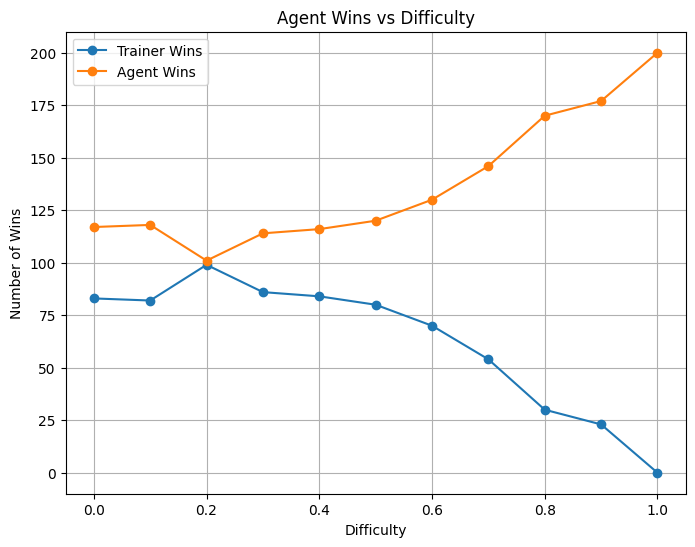

In [14]:
# Plot results
import matplotlib.pyplot as plt

probs = [x[0] for x in results_summary]
agent1_wins = [x[1] for x in results_summary]
agent2_wins = [x[2] for x in results_summary]

plt.figure(figsize=(8, 6))
plt.plot(probs, agent1_wins, label="Trainer Wins", marker='o')
plt.plot(probs, agent2_wins, label="Agent Wins", marker='o')
plt.xlabel("Difficulty")
plt.ylabel("Number of Wins")
plt.title("Agent Wins vs Difficulty")
plt.legend()
plt.grid()
plt.show()

# Prueba de múltiples heurísticas

🔎 Probando combinaciones...

casillas(0.5) + control(0.5)        ➤ Agent Wins: 71  |  Win Rate: 35.5%
casillas(0.5) + control(1.0)        ➤ Agent Wins: 74  |  Win Rate: 37.0%
casillas(0.5) + control(1.5)        ➤ Agent Wins: 73  |  Win Rate: 36.5%
casillas(1.0) + control(0.5)        ➤ Agent Wins: 83  |  Win Rate: 41.5%
casillas(1.0) + control(1.0)        ➤ Agent Wins: 59  |  Win Rate: 29.5%
casillas(1.0) + control(1.5)        ➤ Agent Wins: 74  |  Win Rate: 37.0%
casillas(1.5) + control(0.5)        ➤ Agent Wins: 84  |  Win Rate: 42.0%
casillas(1.5) + control(1.0)        ➤ Agent Wins: 63  |  Win Rate: 31.5%
casillas(1.5) + control(1.5)        ➤ Agent Wins: 68  |  Win Rate: 34.0%
casillas(0.5) + jugadas(0.5)        ➤ Agent Wins: 63  |  Win Rate: 31.5%
casillas(0.5) + jugadas(1.0)        ➤ Agent Wins: 74  |  Win Rate: 37.0%
casillas(0.5) + jugadas(1.5)        ➤ Agent Wins: 73  |  Win Rate: 36.5%
casillas(1.0) + jugadas(0.5)        ➤ Agent Wins: 60  |  Win Rate: 30.0%
casillas(1.0) + jugada

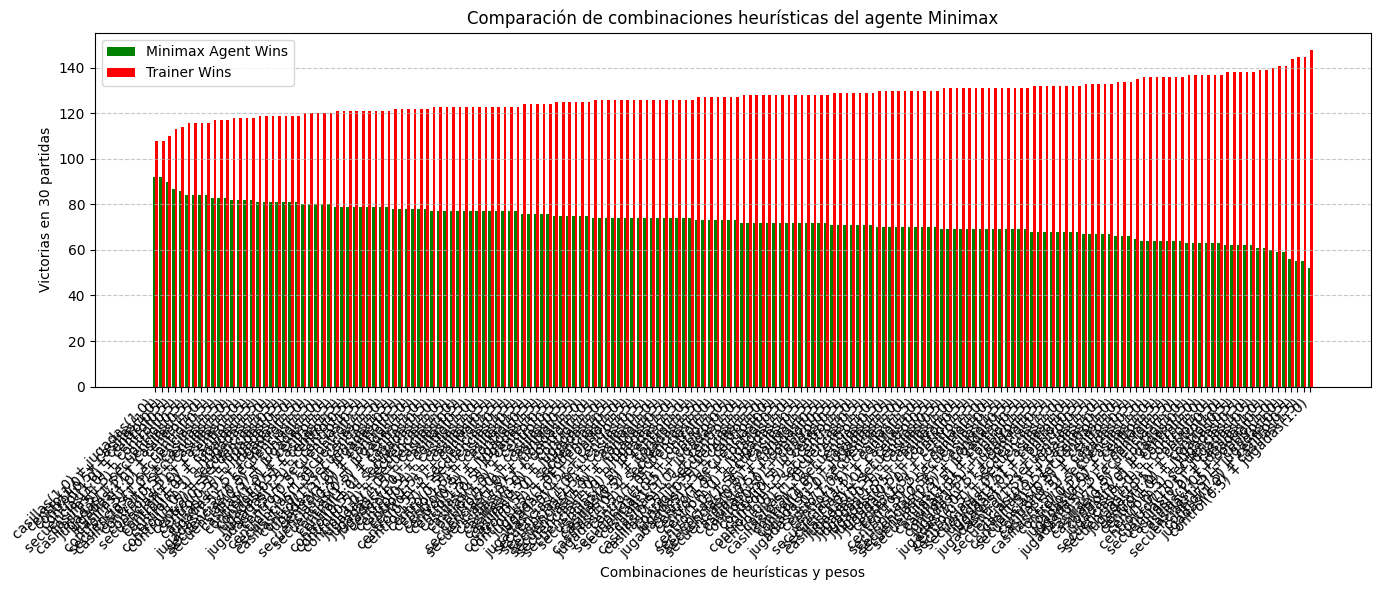

In [ ]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np

#Heuristicas xq no me funciona el import
def heuristic_casillas_encendidas(board):
        # Heurística simple: cantidad de casillas encendidas
        return np.sum(board)

def heuristic_control(board):
    # Heurística de control: cuenta las secuencias de fichas encendidas
    remaining = board.sum()
    sequences = 0
    size = board.shape[0]

    # Contar secuencias en filas y columnas
    for is_row in [0, 1]:
        for idx in range(size):
            line = board[idx, :] if is_row else board[:, idx]
            in_sequence = False
            for val in line:
                if val == 1:
                    if not in_sequence:
                        sequences += 1
                        in_sequence = True
                else:
                    in_sequence = False

    # Más fichas y menos secuencias es mejor (más control)
    return remaining - sequences * 1.5

def heuristic_num_jugadas_posibles(board, agent):
    return len(agent.get_valid_actions(board))

def heuristic_control_centro(board):
    size = board.shape[0]
    center = size // 2
    value = 0
    for i in range(size):
        for j in range(size):
            if board[i, j] == 1:
                # Penaliza cuanto más lejos del centro
                dist = abs(i - center) + abs(j - center)
                value -= dist
    return value

def heuristic_cantidad_secuencias(board):
    size = board.shape[0]
    sequences = 0
    for is_row in [0, 1]:
        for idx in range(size):
            line = board[idx, :] if is_row else board[:, idx]
            in_seq = False
            for val in line:
                if val == 1:
                    if not in_seq:
                        sequences += 1
                        in_seq = True
                else:
                    in_seq = False
    return -sequences  # penaliza muchas secuencias



# Lista de heurísticas con nombre y función
all_heuristics = [
    ("casillas", heuristic_casillas_encendidas),
    ("control", heuristic_control),
    ("jugadas", heuristic_num_jugadas_posibles),
    ("centro", heuristic_control_centro),
    ("secuencias", heuristic_cantidad_secuencias),
]

# Combinaciones de 2 heurísticas
heuristic_combos = list(product(all_heuristics, repeat=2))
weights = [0.5, 1.0, 1.5]
combo_results = []

print("🔎 Probando combinaciones...\n")
for (h1_name, h1_fn), (h2_name, h2_fn) in heuristic_combos:
    if h1_name == h2_name:
        continue  # Evitar duplicadas

    for w1, w2 in product(weights, repeat=2):
        class CustomMinimaxAgent(MinimaxTacTixAgent):
            def heuristic_utility(self_inner, board):
                return w1 * h1_fn(board) + w2 * h2_fn(board)

        agent2 = CustomMinimaxAgent(env, depth=3)
        agent1 = TrainerAgent(env, difficulty=0.5)

        results = run_multiple_games(env, agent1, agent2, num_games=200)
        agent_wins = results["agent2_wins"]
        trainer_wins = results["agent1_wins"]
        total = agent_wins + trainer_wins
        win_rate = (agent_wins / total) * 100 if total > 0 else 0

        label = f"{h1_name}({w1}) + {h2_name}({w2})"
        print(f"{label:<35} ➤ Agent Wins: {agent_wins:2d}  |  Win Rate: {win_rate:.1f}%")

        combo_results.append((label, agent_wins, trainer_wins, win_rate))

# Ordenar por porcentaje de victoria
combo_results.sort(key=lambda x: -x[3])

# Gráfico
labels = [r[0] for r in combo_results]
agent_wins = [r[1] for r in combo_results]
trainer_wins = [r[2] for r in combo_results]

plt.figure(figsize=(14, 6))
bar_width = 0.4
x = range(len(labels))

plt.bar(x, agent_wins, width=bar_width, label='Minimax Agent Wins', color='green')
plt.bar([i + bar_width for i in x], trainer_wins, width=bar_width, label='Trainer Wins', color='red')

plt.xticks([i + bar_width / 2 for i in x], labels, rotation=45, ha='right')
plt.xlabel("Combinaciones de heurísticas y pesos")
plt.ylabel("Victorias en 30 partidas")
plt.title("Comparación de combinaciones heurísticas del agente Minimax")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Prueba de multiples combinaciones lineales

In [4]:
from trainer_agent import TrainerAgent
from tactix_env import TacTixEnv
from minimax_agent import MinimaxTacTixAgent
from play import run_multiple_games
import itertools
from concurrent.futures import ThreadPoolExecutor, as_completed
import numpy as np

#Heuristicas xq no me funciona el import
def heuristic_casillas_encendidas(board):
        # Heurística simple: cantidad de casillas encendidas
        return np.sum(board)

def heuristic_control(board):
    # Heurística de control: cuenta las secuencias de fichas encendidas
    remaining = board.sum()
    sequences = 0
    size = board.shape[0]

    # Contar secuencias en filas y columnas
    for is_row in [0, 1]:
        for idx in range(size):
            line = board[idx, :] if is_row else board[:, idx]
            in_sequence = False
            for val in line:
                if val == 1:
                    if not in_sequence:
                        sequences += 1
                        in_sequence = True
                else:
                    in_sequence = False

    # Más fichas y menos secuencias es mejor (más control)
    return remaining - sequences * 1.5

def heuristic_num_jugadas_posibles(board, agent):
    return len(agent.get_valid_actions(board))

def heuristic_control_centro(board):
    size = board.shape[0]
    center = size // 2
    value = 0
    for i in range(size):
        for j in range(size):
            if board[i, j] == 1:
                # Penaliza cuanto más lejos del centro
                dist = abs(i - center) + abs(j - center)
                value -= dist
    return value

def heuristic_cantidad_secuencias(board):
    size = board.shape[0]
    sequences = 0
    for is_row in [0, 1]:
        for idx in range(size):
            line = board[idx, :] if is_row else board[:, idx]
            in_seq = False
            for val in line:
                if val == 1:
                    if not in_seq:
                        sequences += 1
                        in_seq = True
                else:
                    in_seq = False
    return -sequences  # penaliza muchas secuencias

# ---------- COMBINADOR DE HEURÍSTICAS ----------
def custom_heuristic_factory(w1, w2, w3, w4, w5):
    def combined_heuristic(board, agent):
        return (
            w1 * heuristic_casillas_encendidas(board) +
            w2 * heuristic_control(board) +
            w3 * heuristic_num_jugadas_posibles(board, agent) +
            w4 * heuristic_control_centro(board) +
            w5 * heuristic_cantidad_secuencias(board)
        )
    return combined_heuristic

# ---------- AGENTE PERSONALIZADO ----------
class CustomMinimaxAgent(MinimaxTacTixAgent):
    def __init__(self, env, depth, heuristic_fn):
        super().__init__(env, depth)
        self.heuristic_fn = heuristic_fn

    def evaluate_board(self, board):
        return self.heuristic_fn(board, self)

# ---------- PRUEBA DE UNA COMBINACIÓN ----------
def evaluate_combination(weights):
    w1, w2, w3, w4, w5 = weights
    if sum(weights) == 0:
        return weights, 0  # evitamos división por cero

    env = TacTixEnv(board_size=6, misere=False)
    heuristic_fn = custom_heuristic_factory(w1, w2, w3, w4, w5)
    agent2 = CustomMinimaxAgent(env, depth=3, heuristic_fn=heuristic_fn)
    agent1 = TrainerAgent(env, difficulty=0.8) # Fijamos la dificultad del agente entrenador

    results = run_multiple_games(env, agent1, agent2, num_games=200)
    win_rate = results["agent2_wins"] / 200
    return weights, win_rate

# ---------- GENERAR COMBINACIONES ----------
weight_values = [0.0, 0.5, 1.0, 1.5]
all_combinations = list(itertools.product(weight_values, repeat=5))

# ---------- EVALUAR EN PARALELO ----------
print("🔎 Evaluando combinaciones de las 5 heurísticas (200 partidas c/u, profundidad 4)...\n")
best_combination = None
best_win_rate = -1

with ThreadPoolExecutor(max_workers=8) as executor:
    futures = [executor.submit(evaluate_combination, combo) for combo in all_combinations]
    for future in as_completed(futures):
        weights, win_rate = future.result()
        w1, w2, w3, w4, w5 = weights
        print(f"w1:{w1} w2:{w2} w3:{w3} w4:{w4} w5:{w5} ➤ Win Rate: {win_rate:.2%}")

        if win_rate > best_win_rate:
            best_win_rate = win_rate
            best_combination = weights

# ---------- RESULTADO FINAL ----------
print("\n🎯 Mejor combinación encontrada:")
labels = ["casillas", "control", "jugadas", "centro", "secuencias"]
for label, weight in zip(labels, best_combination):
    print(f"{label:>10}: {weight}")
print(f"✅ Win rate: {best_win_rate:.2%}")


🔎 Evaluando combinaciones de las 5 heurísticas (200 partidas c/u, profundidad 4)...

w1:0.0 w2:0.0 w3:0.0 w4:0.0 w5:0.0 ➤ Win Rate: 0.00%
w1:0.0 w2:0.0 w3:0.0 w4:0.0 w5:0.5 ➤ Win Rate: 66.00%
w1:0.0 w2:0.0 w3:0.0 w4:0.0 w5:1.5 ➤ Win Rate: 68.50%
w1:0.0 w2:0.0 w3:0.0 w4:0.0 w5:1.0 ➤ Win Rate: 72.50%
w1:0.0 w2:0.0 w3:0.0 w4:0.5 w5:0.5 ➤ Win Rate: 67.50%
w1:0.0 w2:0.0 w3:0.0 w4:0.5 w5:1.0 ➤ Win Rate: 73.50%
w1:0.0 w2:0.0 w3:0.0 w4:0.5 w5:0.0 ➤ Win Rate: 53.50%
w1:0.0 w2:0.0 w3:0.0 w4:1.0 w5:0.0 ➤ Win Rate: 62.00%
w1:0.0 w2:0.0 w3:0.0 w4:0.5 w5:1.5 ➤ Win Rate: 73.00%
w1:0.0 w2:0.0 w3:0.0 w4:1.0 w5:0.5 ➤ Win Rate: 71.00%
w1:0.0 w2:0.0 w3:0.0 w4:1.0 w5:1.0 ➤ Win Rate: 70.50%
w1:0.0 w2:0.0 w3:0.0 w4:1.0 w5:1.5 ➤ Win Rate: 68.00%
w1:0.0 w2:0.0 w3:0.0 w4:1.5 w5:0.0 ➤ Win Rate: 71.50%
w1:0.0 w2:0.0 w3:0.5 w4:0.0 w5:0.5 ➤ Win Rate: 84.50%
w1:0.0 w2:0.0 w3:0.0 w4:1.5 w5:0.5 ➤ Win Rate: 70.50%
w1:0.0 w2:0.0 w3:0.0 w4:1.5 w5:1.0 ➤ Win Rate: 70.50%
w1:0.0 w2:0.0 w3:0.0 w4:1.5 w5:1.5 ➤ Win Rate: 75.50